<h2>Step 1: Making the Imports</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Step 2: Data Reading and Preprocessing</h2>
<h4>2.1. Data Import and Overview</h4>

In [2]:
data = pd.read_csv("./heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<p>We have a dataset of 918 items with 12 attributes. The feature space possesses both categorical and numerical attributes.</p>

<h4>2.2. Checking for blank or missing values</h4>

In [3]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<p>There are no blank or missing values in this dataset.</p>

<h4>2.3. Checking for correlation using Correlation Matrix</h4>

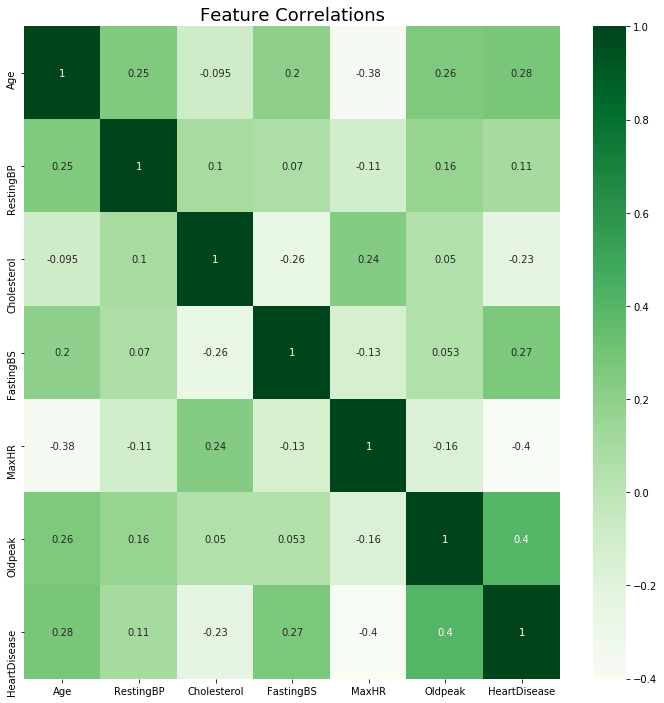

In [4]:
corr = data.corr()
plt.figure(figsize = (12, 12))
plt.title("Feature Correlations", fontsize = 18)
sns.heatmap(corr, annot = True, cmap = "Greens")

<p>No two features depict correlation greater than the threshold value of 0.5</p>

<h4>2.4. Checking for multicollinearity using VIF</h4>

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
numeric_ds = data.select_dtypes(['number'])
vif["features"] = numeric_ds.columns
vif["VIF"] = [variance_inflation_factor(numeric_ds.values, i) for i in range(numeric_ds.shape[1])]
vif

,features,VIF
0,Age,30.462968
1,RestingBP,43.070748
2,Cholesterol,5.106418
3,FastingBS,1.500987
4,MaxHR,20.458949
5,Oldpeak,2.122029
6,HeartDisease,3.222266


<p>
The restingBP, Age, and MaxHR have VIF big value. It is showing that there are colinearity in those 3 features. Therefore, we drop the biggest VIF (RestingBP) then calculate again the VIF.</p>

In [5]:
numeric_ds = numeric_ds.drop('RestingBP', axis=1)
vif.drop(vif.index, inplace=True)
vif["features"] = numeric_ds.columns
vif["VIF"] = [variance_inflation_factor(numeric_ds.values, i) for i in range(numeric_ds.shape[1])]
vif

,features,VIF
0,Age,17.294587
1,Cholesterol,4.960139
2,FastingBS,1.500343
3,MaxHR,14.889208
4,Oldpeak,2.121690
5,HeartDisease,3.151320


<p>We could see that the VIF reduced. Now we proceed to drop Age then calculate again the VIF.</p>

In [6]:
numeric_ds = numeric_ds.drop('Age', axis=1)
vif.drop(vif.index, inplace=True)
vif["features"] = numeric_ds.columns
vif["VIF"] = [variance_inflation_factor(numeric_ds.values, i) for i in range(numeric_ds.shape[1])]
vif

,features,VIF
0,Cholesterol,4.846509
1,FastingBS,1.455528
2,MaxHR,6.048800
3,Oldpeak,2.077846
4,HeartDisease,2.651516


<p>After dropping RestingBP and Age, we got VIF which acceptable. Is is indeed showing similiar information between Age, RestingBP, and MaxHR. I'm not from medical background, but it is logical that someone's resting blood pressure and heart rate is varies depend on someone's age. Therefore, we drop those 2 features from our main dataset.</p>

In [7]:
data = data.drop(['Age', 'RestingBP'], axis=1)
data

,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,M,ATA,289,0,Normal,172,N,0.0,Up,0
1,F,NAP,180,0,Normal,156,N,1.0,Flat,1
2,M,ATA,283,0,ST,98,N,0.0,Up,0
3,F,ASY,214,0,Normal,108,Y,1.5,Flat,1
4,M,NAP,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,M,TA,264,0,Normal,132,N,1.2,Flat,1
914,M,ASY,193,1,Normal,141,N,3.4,Flat,1
915,M,ASY,131,0,Normal,115,Y,1.2,Flat,1
916,F,ATA,236,0,LVH,174,N,0.0,Flat,1


<h4>2.5. Converting Categorical Attributes into Numerical</h4>

In [8]:
data.select_dtypes(exclude="number").nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

<p>There are 5 categorical attributes out of which 2 are binary, which can be converted into equivalent numerical attributes using label encoding. The rest can be converted using one hot encoding. Why tho</p>

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['ExerciseAngina']=le.fit_transform(data['ExerciseAngina'])
data

,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,ATA,289,0,Normal,172,0,0.0,Up,0
1,0,NAP,180,0,Normal,156,0,1.0,Flat,1
2,1,ATA,283,0,ST,98,0,0.0,Up,0
3,0,ASY,214,0,Normal,108,1,1.5,Flat,1
4,1,NAP,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,1,TA,264,0,Normal,132,0,1.2,Flat,1
914,1,ASY,193,1,Normal,141,0,3.4,Flat,1
915,1,ASY,131,0,Normal,115,1,1.2,Flat,1
916,0,ATA,236,0,LVH,174,0,0.0,Flat,1


<p>Encoded Sex to : 1 if Male, 0 if Female,</br>
Encoded ExerciseAngina to : 1 if Yes, 0 if No.
</p>

In [10]:
data = pd.get_dummies(data, drop_first=False)
data

,Sex,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,1,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,0,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,1,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,0,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,1,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,1,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,1,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,0,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


In [37]:
heart_dis = data['HeartDisease']
data = data.drop('HeartDisease',axis=1)
data.insert(loc = len(data.columns), column = 'HeartDisease', value = heart_dis)
data

,Sex,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,1,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1,0
1,0,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0,1
2,1,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1,0
3,0,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0,1
4,1,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,264,0,132,0,1.2,0,0,0,1,0,1,0,0,1,0,1
914,1,193,1,141,0,3.4,1,0,0,0,0,1,0,0,1,0,1
915,1,131,0,115,1,1.2,1,0,0,0,0,1,0,0,1,0,1
916,0,236,0,174,0,0.0,0,1,0,0,1,0,0,0,1,0,1


<p>One-Hot Encoded the remaining categorical attributes.</p>

<h4>2.6. Transforming dataset into an Array</h4>

In [38]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values
X

array([[  1., 289.,   0., ...,   0.,   0.,   1.],
       [  0., 180.,   0., ...,   0.,   1.,   0.],
       [  1., 283.,   0., ...,   0.,   0.,   1.],
       ...,
       [  1., 131.,   0., ...,   0.,   1.,   0.],
       [  0., 236.,   0., ...,   0.,   1.,   0.],
       [  1., 175.,   0., ...,   0.,   0.,   1.]])

In [16]:
Y

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,

<h4>2.7. Separating the Training and Testing Set</h4>

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=27)

In [40]:
print(x_train)

[[  1. 458.   1. ...   1.   0.   0.]
 [  1. 321.   0. ...   0.   0.   1.]
 [  0. 283.   1. ...   0.   0.   1.]
 ...
 [  1. 203.   0. ...   0.   1.   0.]
 [  1. 198.   0. ...   0.   1.   0.]
 [  1. 267.   0. ...   0.   1.   0.]]


In [41]:
print(y_train)

[0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0
 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0
 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0
 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1
 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1
 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0
 0 1 1 1 0 1 1 1 0 0 0 1 

In [20]:
print(x_test)

[[  1. 275.   1. ...   1.   1.   0.]
 [  1. 204.   0. ...   0.   0.   0.]
 [  1.   0.   0. ...   1.   0.   1.]
 ...
 [  0.   0.   1. ...   0.   1.   0.]
 [  1. 234.   0. ...   0.   0.   1.]
 [  1. 269.   0. ...   0.   0.   0.]]


In [21]:
print(y_test)

[0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 0 0 1]


<p> Separated the dataset into training and testing sets to train the classification models and test the set to validate and calculate accuracy. </p>

<h4> 2.8 Scaling the Training Set </h4>

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
print (x_train)

[[ 0.52352084  2.4030476   1.84668796 ... -0.50771021  3.53414715
  -1.01759666]
 [ 0.52352084  1.12848987 -0.54151    ... -0.50771021 -0.2829537
  -1.01759666]
 [-1.91014362  0.77496291  1.84668796 ... -0.50771021 -0.2829537
  -1.01759666]
 ...
 [ 0.52352084  0.03069562 -0.54151    ... -0.50771021 -0.2829537
   0.98270763]
 [ 0.52352084 -0.01582109 -0.54151    ... -0.50771021 -0.2829537
   0.98270763]
 [ 0.52352084  0.62610945 -0.54151    ... -0.50771021 -0.2829537
   0.98270763]]


In [33]:
print(x_test)

[[ 0.52352084  1.57505024 -0.54151    ... -0.50771021 -0.2829537
   0.98270763]
 [ 0.52352084  0.15163905 -0.54151    ... -0.50771021 -0.2829537
  -1.01759666]
 [ 0.52352084  0.82147961 -0.54151    ... -0.50771021 -0.2829537
   0.98270763]
 ...
 [ 0.52352084  0.17954907 -0.54151    ...  1.96962753 -0.2829537
   0.98270763]
 [-1.91014362  0.2539758  -0.54151    ... -0.50771021 -0.2829537
   0.98270763]
 [-1.91014362  0.28188583 -0.54151    ... -0.50771021 -0.2829537
  -1.01759666]]


<h2> Step 3 - Building Classification Models </h2>
<h4> 3.1 - Classification model building using SVC with RBF Kernel </h4>

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
classifier = SVC(kernel='rbf', random_state=27)

params = {'C':[0.1,1,10,100,1000],
          'gamma':[1,0.1,0.01,0.001,0.0001],
          'shrinking':[True,False],
          'probability':[True,False]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='recall')
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=27, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'probability': [True, False],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [45]:
Model_best = grid_search.best_estimator_

In [46]:
from sklearn.metrics import accuracy_score,recall_score,plot_roc_curve

0.5552325581395349
1.0


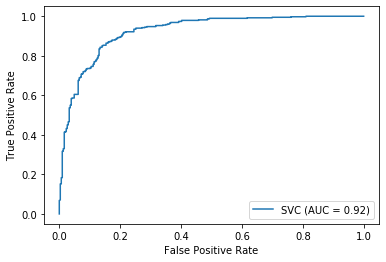

In [48]:
from sklearn.metrics import roc_auc_score


y_train_pred = Model_best.predict(x_train)
plot_roc_curve(Model_best,x_train,y_train)

print(accuracy_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

0.5478260869565217
1.0


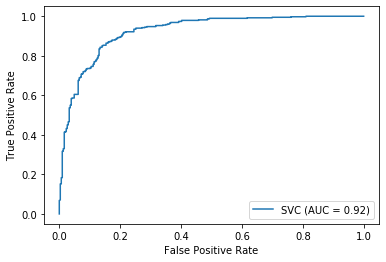

In [49]:
y_test_pred = Model_best.predict(x_test)
plot_roc_curve(Model_best,x_train, y_train)
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

In [50]:
Model = SVC(kernel='rbf', random_state=100)
classifier = Model.fit(x_train,y_train)
y_pred =  classifier.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.91      0.80      0.85       104
           1       0.85      0.94      0.89       126

    accuracy                           0.87       230
   macro avg       0.88      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230



In [51]:
params = {'C':[0.1,1,10,100,1000],
          'gamma':[1,0.1,0.01,0.001,0.0001],
          'shrinking':[True,False],
          'probability':[True,False]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=100, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'probability': [True, False],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [52]:
Model_best = grid_search.best_estimator_

0.875
0.9136125654450262


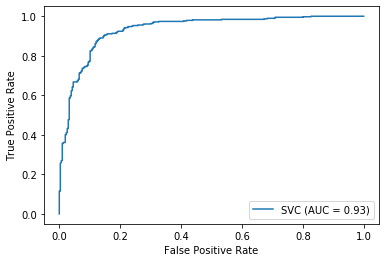

In [53]:
plot_roc_curve(Model_best,x_train,y_train)
y_train_pred = Model_best.predict(x_train)

print(accuracy_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

0.8739130434782608
0.9206349206349206


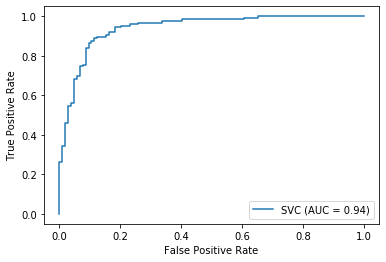

In [54]:
plot_roc_curve(Model_best,x_test,y_test)
y_test_pred = Model_best.predict(x_test)

print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

<p> Here recall is considered as an important metric for scoring as it is most important to predict True positive cases for heart disease </p>

<h4> 3.2 Random Forest Classification Model </h4>

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1)

params = {'max_depth':[5,20,60,100],
         'min_samples_leaf':[10,40,80],
         'n_estimators':[50,100,200], 
         'max_features': [0.3,0.6,0.7],
         'criterion': ["gini", "entropy"]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='recall')
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=100,
                                

In [58]:
Model_best = grid_search.best_estimator_

0.8575581395348837
0.9136125654450262


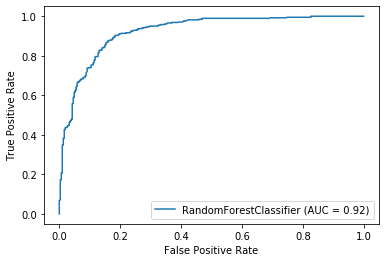

In [59]:
plot_roc_curve(Model_best,x_train,y_train)
y_train_pred = Model_best.predict(x_train)

print(accuracy_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

0.8652173913043478
0.9126984126984127


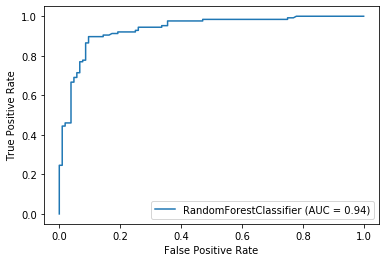

In [60]:
plot_roc_curve(Model_best,x_test,y_test)
y_test_pred = Model_best.predict(x_test)

print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

In [61]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1)

params = {'max_depth':[5,20,60,100],
         'min_samples_leaf':[10,40,80],
         'n_estimators':[50,100,200], 
         'max_features': [0.3,0.6,0.7],
         'criterion': ["gini", "entropy"]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=100,
                                

In [62]:
Model_best = grid_search.best_estimator_

0.8808139534883721
0.9214659685863874


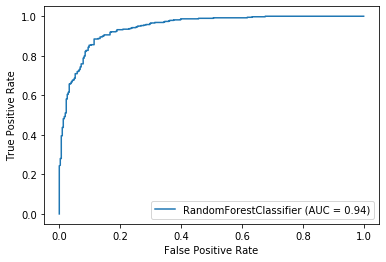

In [63]:
plot_roc_curve(Model_best,x_train,y_train)
y_train_pred = Model_best.predict(x_train)

print(accuracy_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

0.8869565217391304
0.9365079365079365


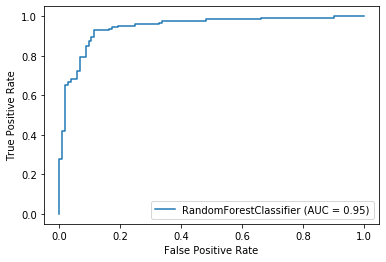

In [64]:
plot_roc_curve(Model_best,x_test,y_test)
y_test_pred = Model_best.predict(x_test)

print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))